In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

In [2]:
ruta = "Ventas.csv"

In [3]:
df = pd.read_csv(ruta)

In [4]:
df.head()

,Fecha,DíaDeLaSemana,Promociones,Festivo,Ventas
0,2022-01-01,6,0,0,4033
1,2022-01-02,7,0,1,4012
2,2022-01-03,1,0,0,1608
3,2022-01-04,2,1,0,2046
4,2022-01-05,3,0,0,2484


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Fecha          365 non-null    object
 1   DíaDeLaSemana  365 non-null    int64 
 2   Promociones    365 non-null    int64 
 3   Festivo        365 non-null    int64 
 4   Ventas         365 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 14.4+ KB


podem observar que no hi ha valors null


In [6]:
df["Fecha"] = pd.to_datetime(df["Fecha"])

In [7]:
type(df["Fecha"][0])

pandas._libs.tslibs.timestamps.Timestamp

ja tenim les datas en format correcte


In [22]:
escala = MinMaxScaler(feature_range=(0,1))

# Eliminem les columnes no dessitjades i guardem els noms
columnas_para_escalar = df.drop(["Ventas", "Fecha"], axis = 1).columns

In [23]:
columnas_para_escalar

Index(['DíaDeLaSemana', 'Promociones', 'Festivo'], dtype='object')

In [24]:
#normalitzem les dades
normalitzat = escala.fit_transform(df[columnas_para_escalar])
df_normlitzat = pd.DataFrame(normalitzat, columns=columnas_para_escalar)

#afegim les dades que no calia normalitzar

df_normlitzat["Ventas"] = df["Ventas"]
df_normlitzat["Fecha"] = df["Fecha"]

In [25]:
df_normlitzat.head()

,DíaDeLaSemana,Promociones,Festivo,Ventas,Fecha
0,0.833333,0.0,0.0,4033,2022-01-01
1,1.000000,0.0,1.0,4012,2022-01-02
2,0.000000,0.0,0.0,1608,2022-01-03
3,0.166667,1.0,0.0,2046,2022-01-04
4,0.333333,0.0,0.0,2484,2022-01-05


In [26]:
#identificar variables dependents e independents

X = df_normlitzat.drop(["Ventas","Fecha"],axis = 1)
y = df_normlitzat["Ventas"]


In [27]:
X_entrena, X_prueba, y_entrena, y_prueba = train_test_split(X, y, train_size=0.7,random_state=42)



# Anàlisi Exploratori EDA

In [14]:
df.describe()

,Fecha,DíaDeLaSemana,Promociones,Festivo,Ventas
count,365,365.000000,365.000000,365.000000,365.000000
mean,2022-07-01 23:59:59.999999744,4.005479,0.200000,0.142466,2997.219178
min,2022-01-01 00:00:00,1.000000,0.000000,0.000000,1305.000000
25%,2022-04-02 00:00:00,2.000000,0.000000,0.000000,2195.000000
50%,2022-07-02 00:00:00,4.000000,0.000000,0.000000,3074.000000
75%,2022-10-01 00:00:00,6.000000,0.000000,0.000000,3979.000000
max,2022-12-31 00:00:00,7.000000,1.000000,1.000000,4404.000000
std,NaN,2.002738,0.400549,0.350007,942.096284


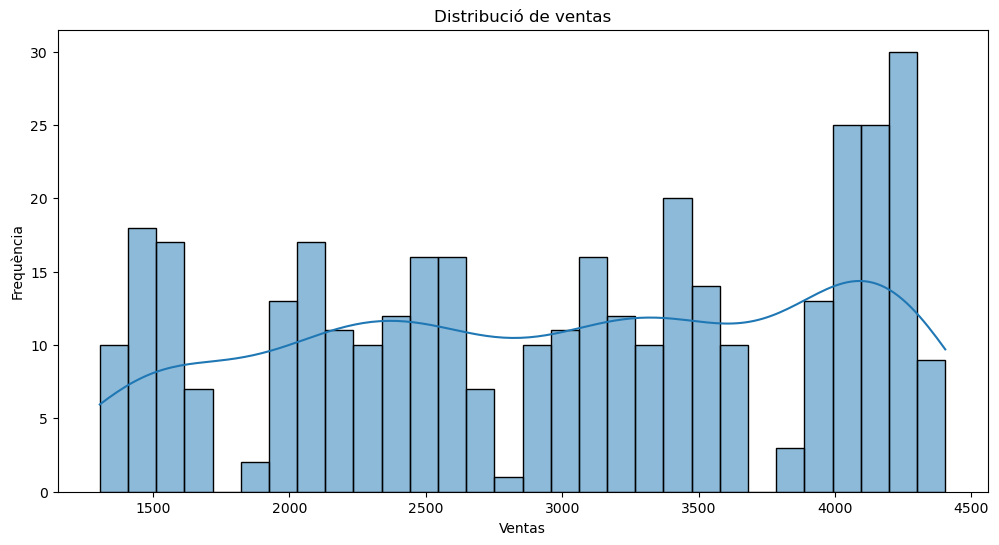

In [15]:
plt.figure(figsize=(12,6))
sns.histplot(df_normlitzat["Ventas"],bins = 30, kde = True)
plt.title("Distribució de ventas")
plt.xlabel("Ventas")
plt.ylabel("Frequència");

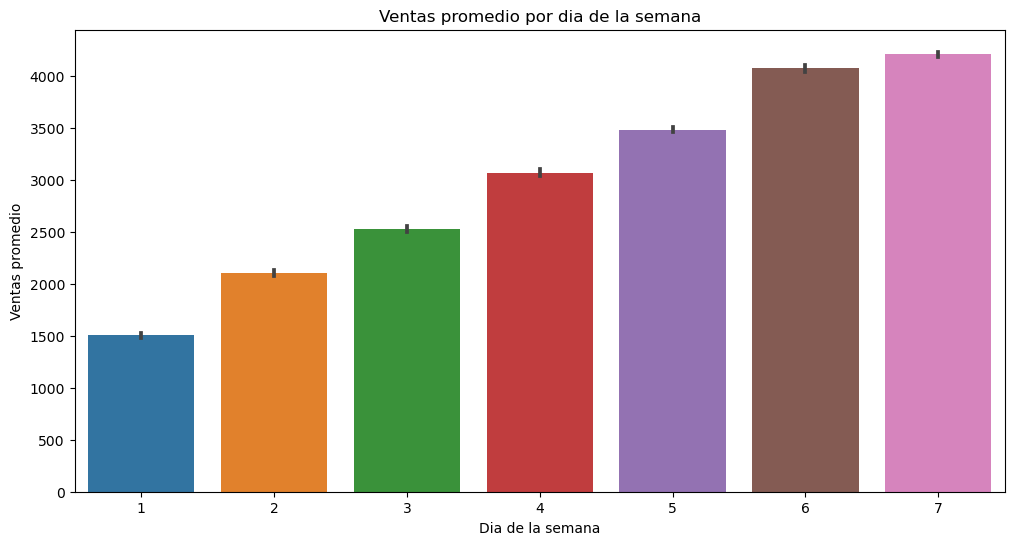

In [16]:
plt.figure(figsize=(12,6))
sns.barplot(data = df,x = "DíaDeLaSemana", y = "Ventas",)
plt.title("Ventas promedio por dia de la semana")
plt.xlabel("Dia de la semana")
plt.ylabel("Ventas promedio");

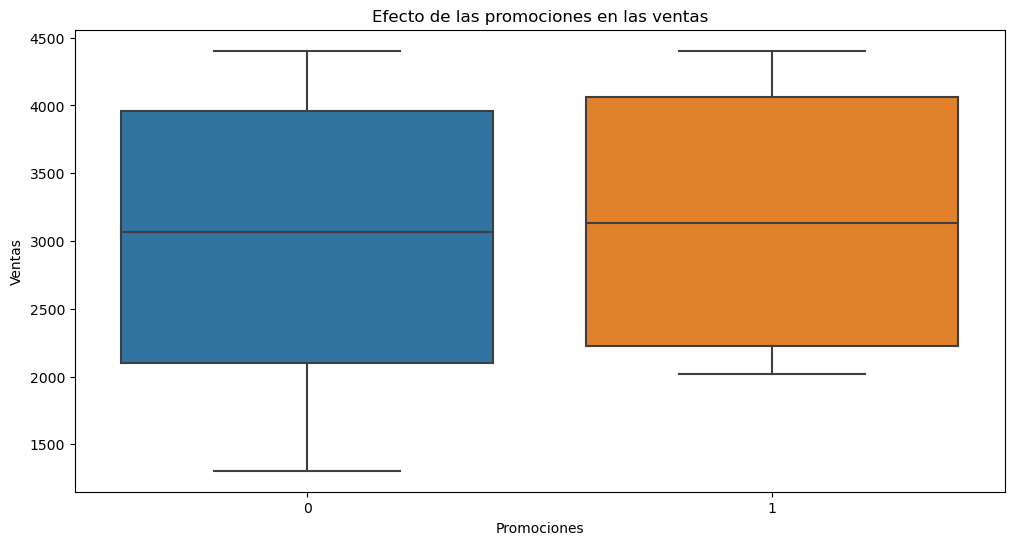

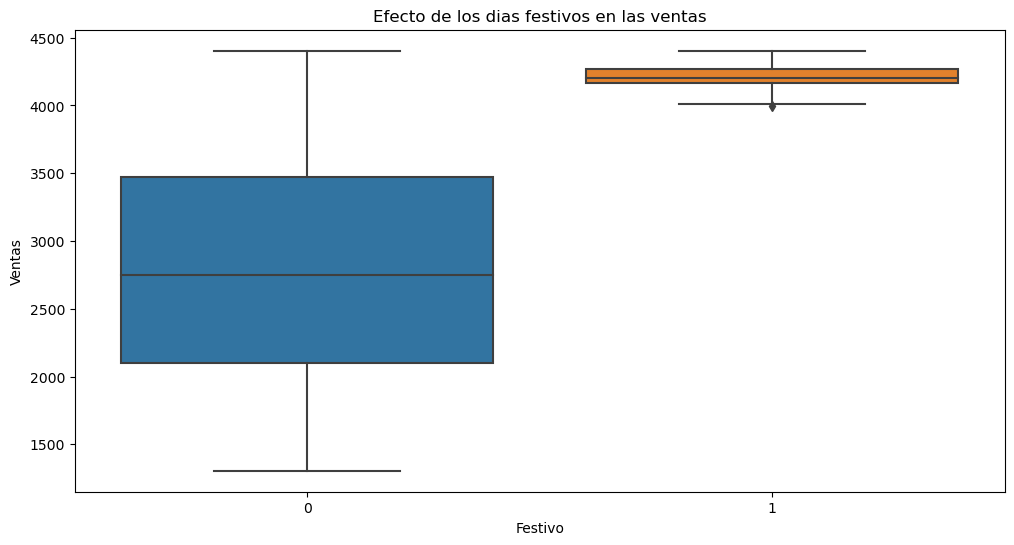

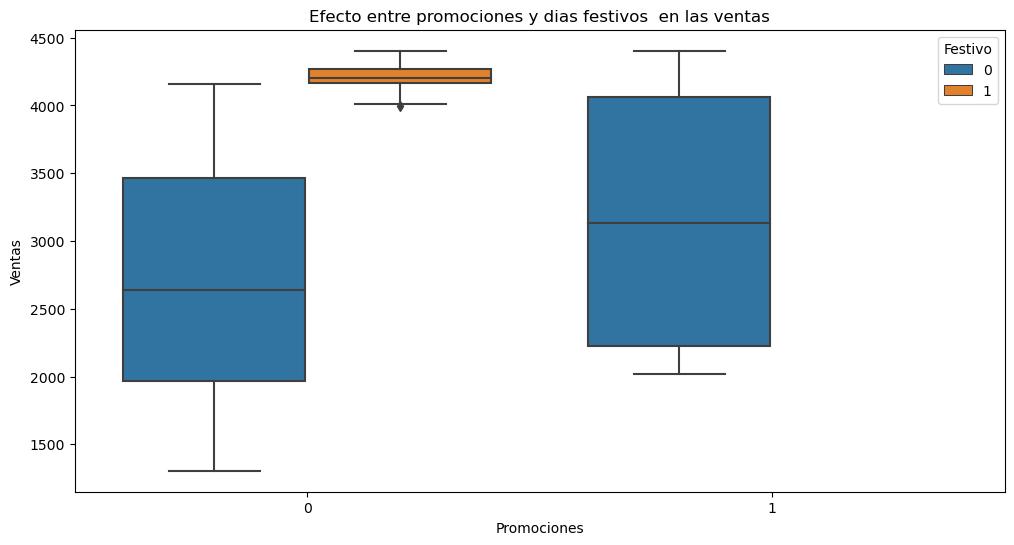

In [17]:
plt.figure(figsize=(12,6))
sns.boxplot(data = df,x = "Promociones", y = "Ventas")
plt.title("Efecto de las promociones en las ventas")

plt.figure(figsize=(12,6))
sns.boxplot(data = df,x = "Festivo", y = "Ventas")
plt.title("Efecto de los dias festivos en las ventas")

plt.figure(figsize=(12,6))
sns.boxplot(data = df,x = "Promociones", y = "Ventas", hue="Festivo")
plt.title("Efecto entre promociones y dias festivos  en las ventas");

# Selecció del model

In [35]:
models = [
    ("model lineal", LinearRegression()),
    ("Arbre de decisió", DecisionTreeRegressor(random_state=42)),
    ("Random Forest", RandomForestRegressor(random_state=42))
]

In [36]:
for nombre, modelo in models:
    modelo.fit(X_entrena, y_entrena)
    puntuaje = modelo.score(X_prueba, y_prueba)
    print(f'{nombre} : {puntuaje} ')

model lineal : 0.9901259345323099 
Arbre de decisió : 0.9900902545523982 
Random Forest : 0.9899976100408657 


# Entrenament i evaluació del model

In [37]:
model_lineal = LinearRegression()

model_lineal.fit(X_entrena, y_entrena)

prediccions_lineals = model_lineal.predict(X_prueba)

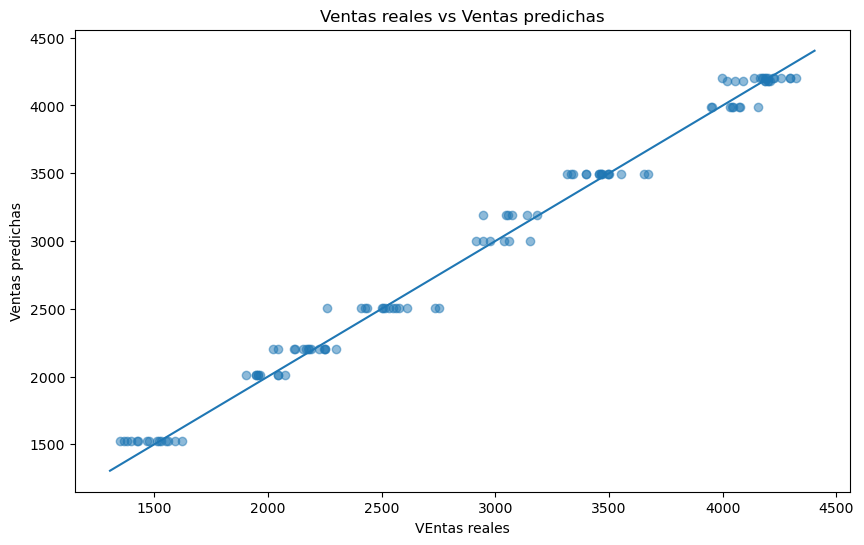

In [41]:
plt.figure(figsize=(10,6))
plt.scatter(y_prueba,prediccions_lineals,alpha=0.5)
plt.plot([y.min(),y.max()],[y.min(),y.max()])
plt.xlabel("VEntas reales")
plt.ylabel("Ventas predichas")
plt.title("Ventas reales vs Ventas predichas");

In [42]:
df_test = pd.DataFrame({"Real":y_prueba, "Predicho": prediccions_lineals})
df_test = df_test.sort_index()

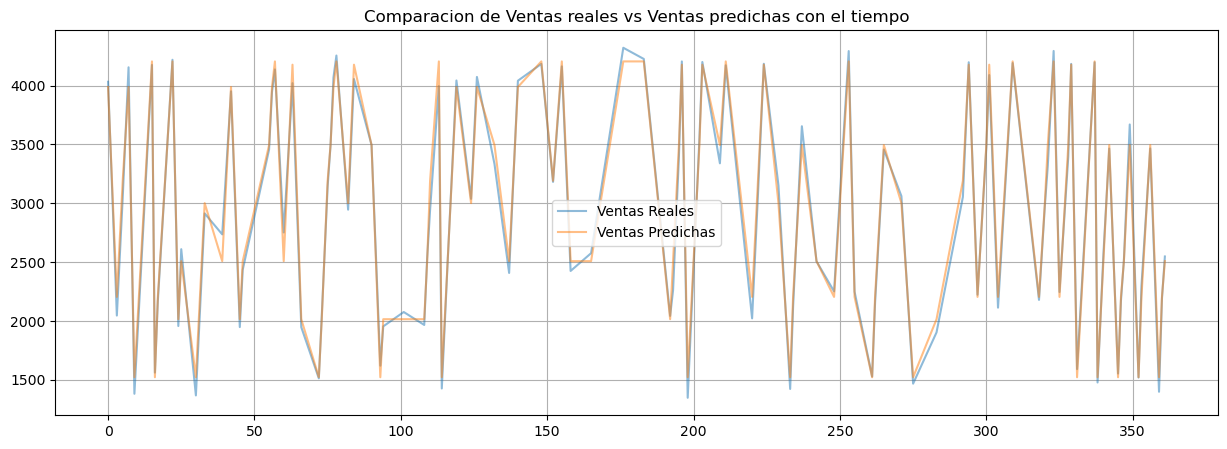

In [43]:
plt.figure(figsize=(15,5))
plt.plot(df_test["Real"],label = "Ventas Reales",alpha=0.5)
plt.plot(df_test["Predicho"],label = "Ventas Predichas",alpha=0.5)
plt.legend()
plt.grid(True)
plt.title("Comparacion de Ventas reales vs Ventas predichas con el tiempo");